In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\wine.csv')
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Dataset description

In [6]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [11]:
data.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [22]:
data['ID'] = range(1, 179, 1)
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [23]:
df = data.drop('Type',axis=1)

In [24]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [25]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Finding missing values

In [27]:
df.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

#### Finding duplicate values

In [28]:
df.duplicated().sum()

0

#### As we can see that there is no null or duplicate values in the dataset.

### EDA
#### Finding the skewness

In [29]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

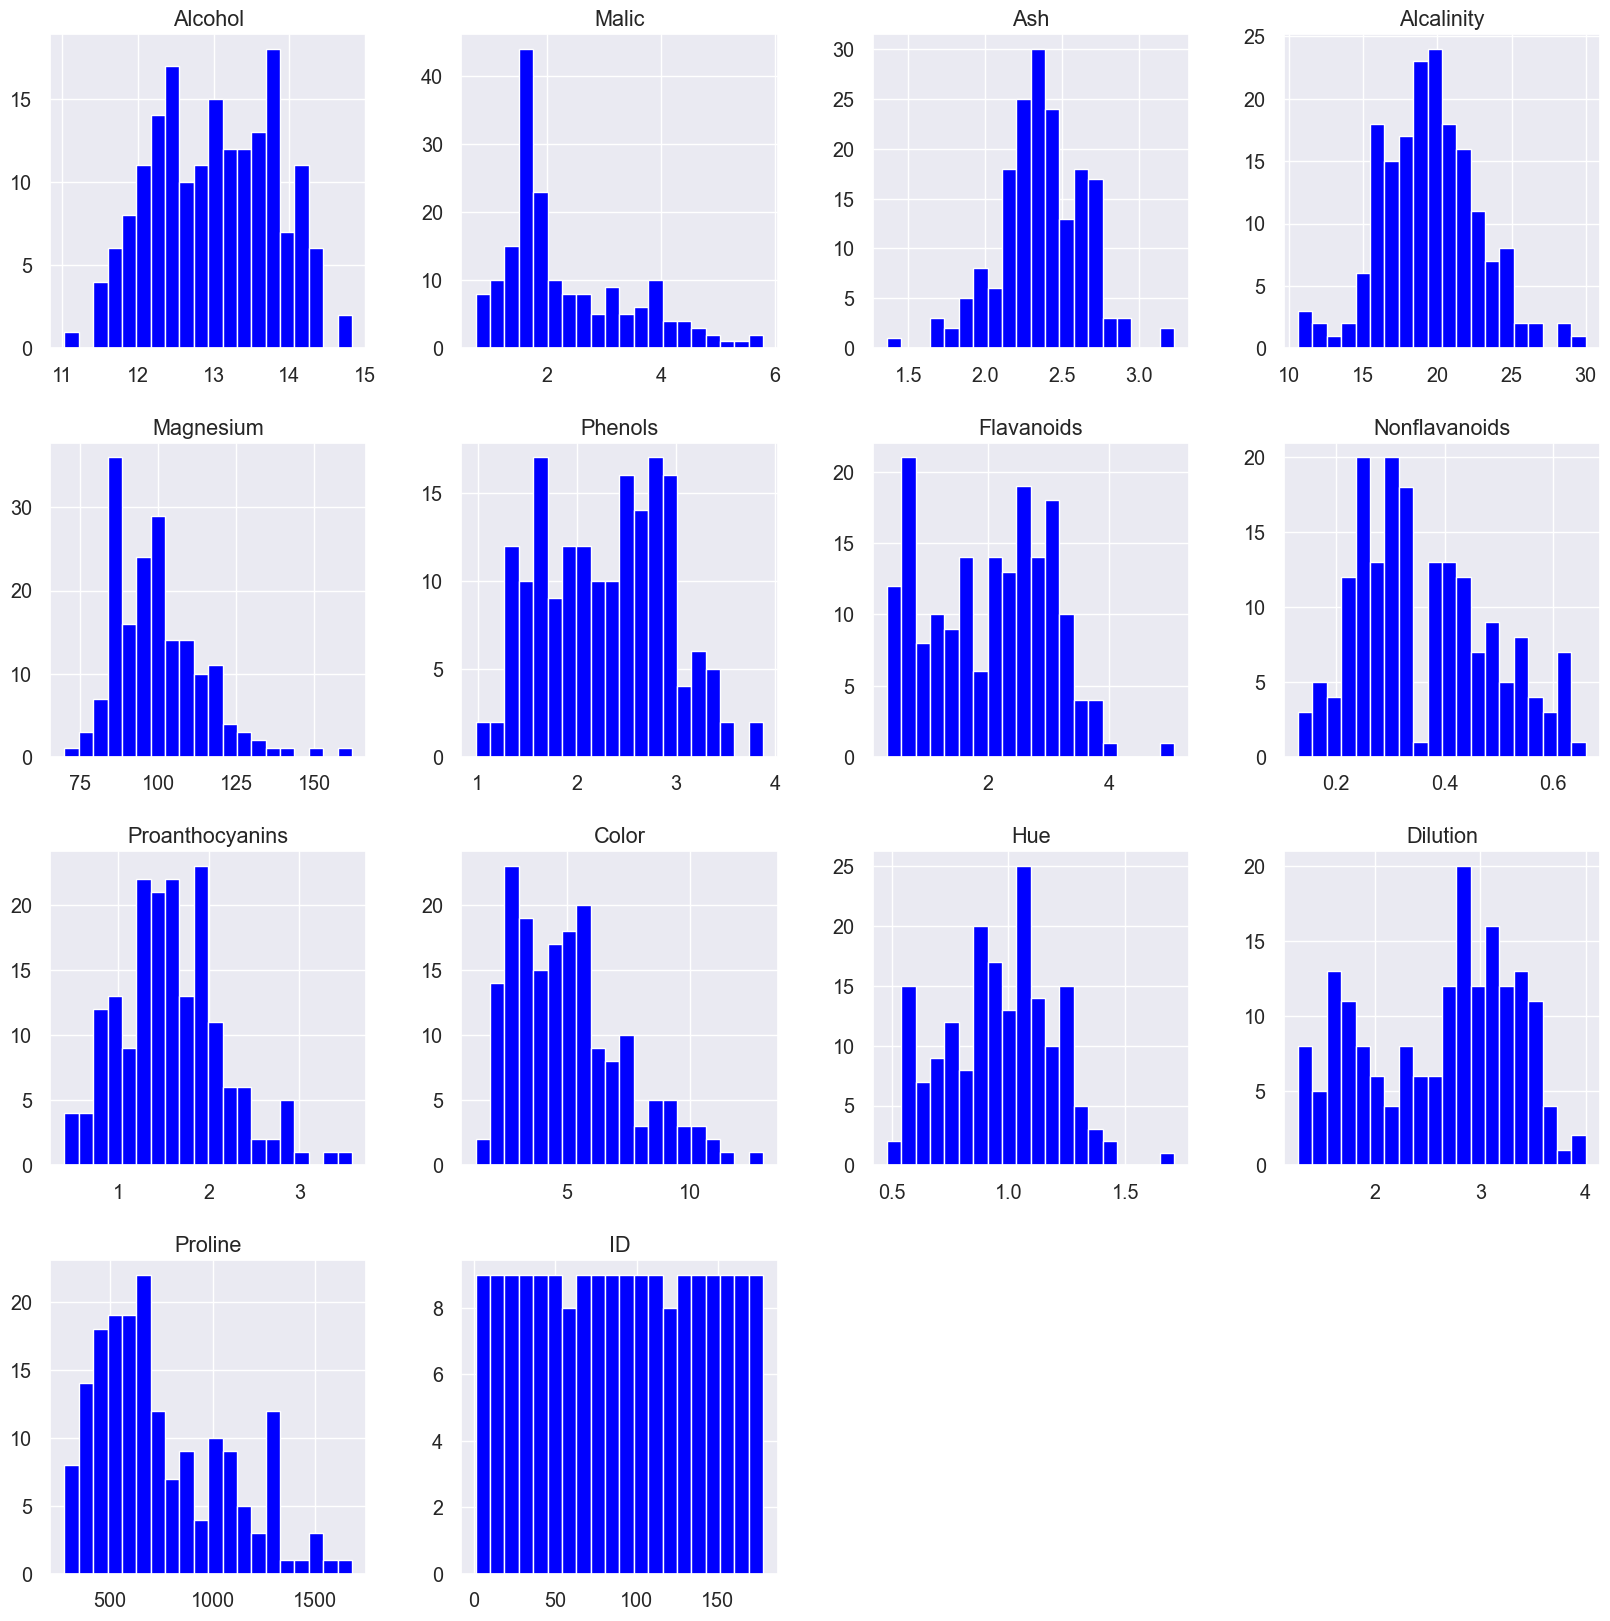

In [30]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

### Outliers Detection 

In [31]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

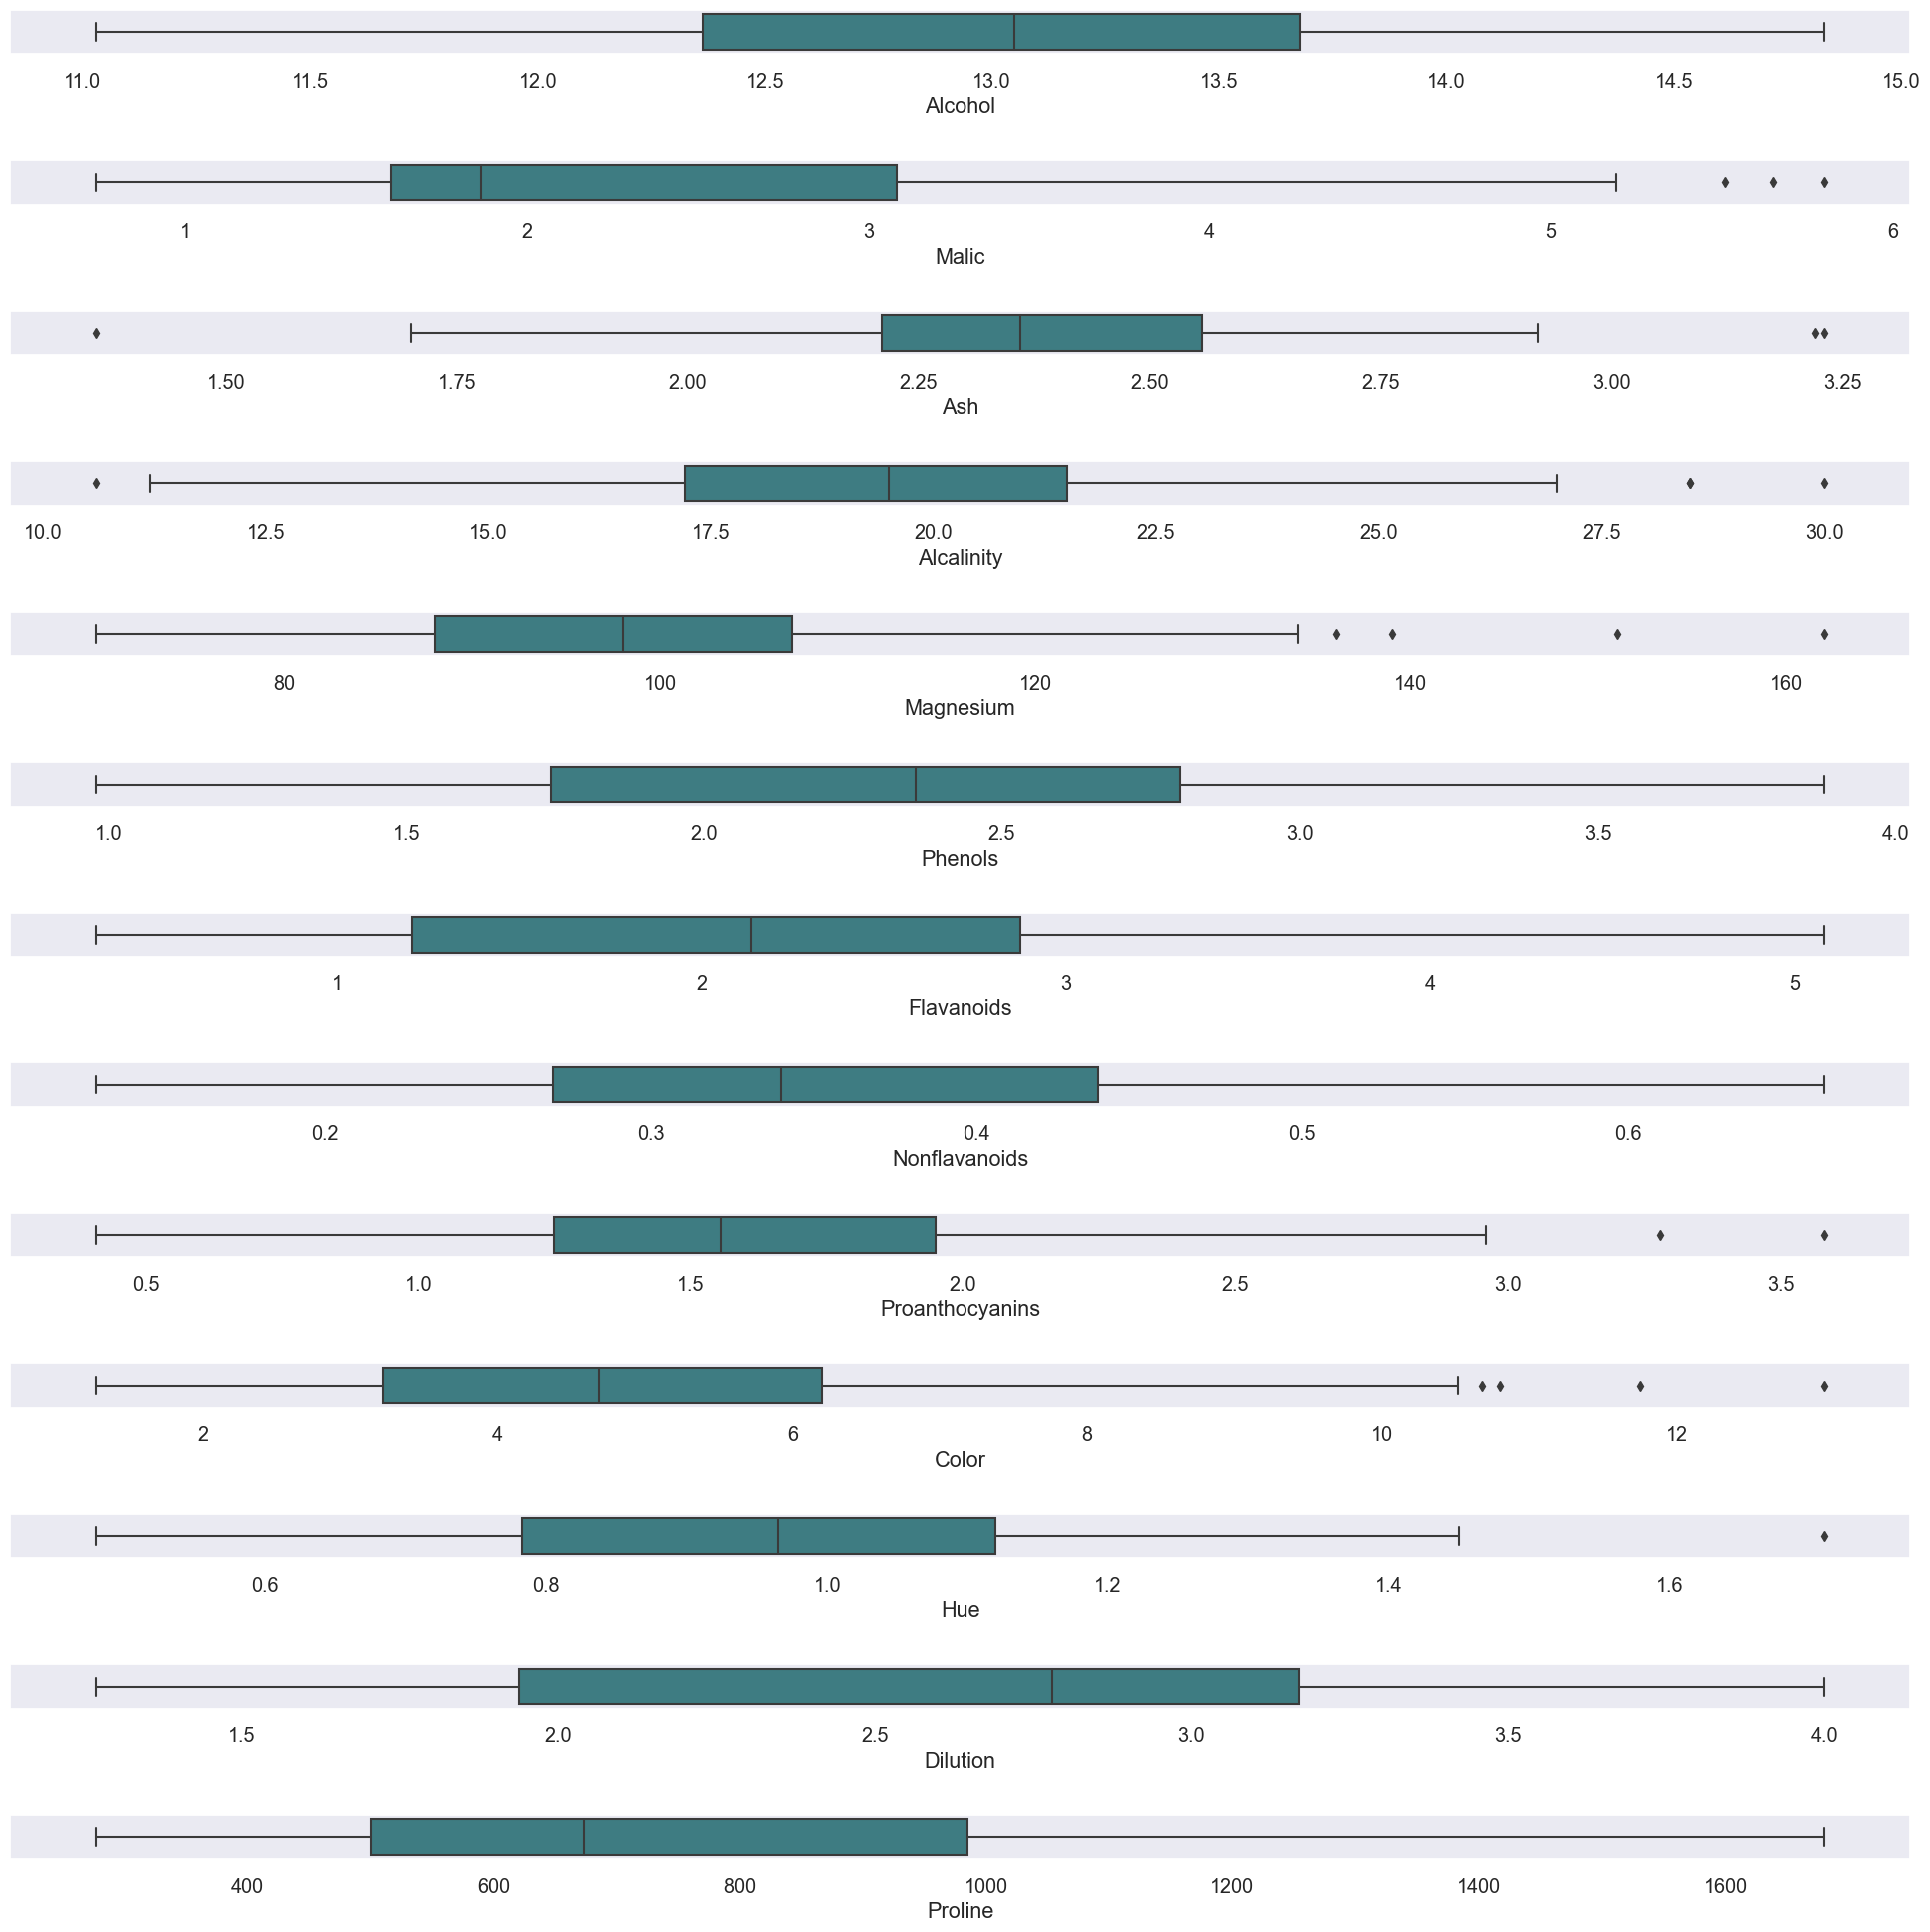

In [32]:
ot=df.copy() 
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

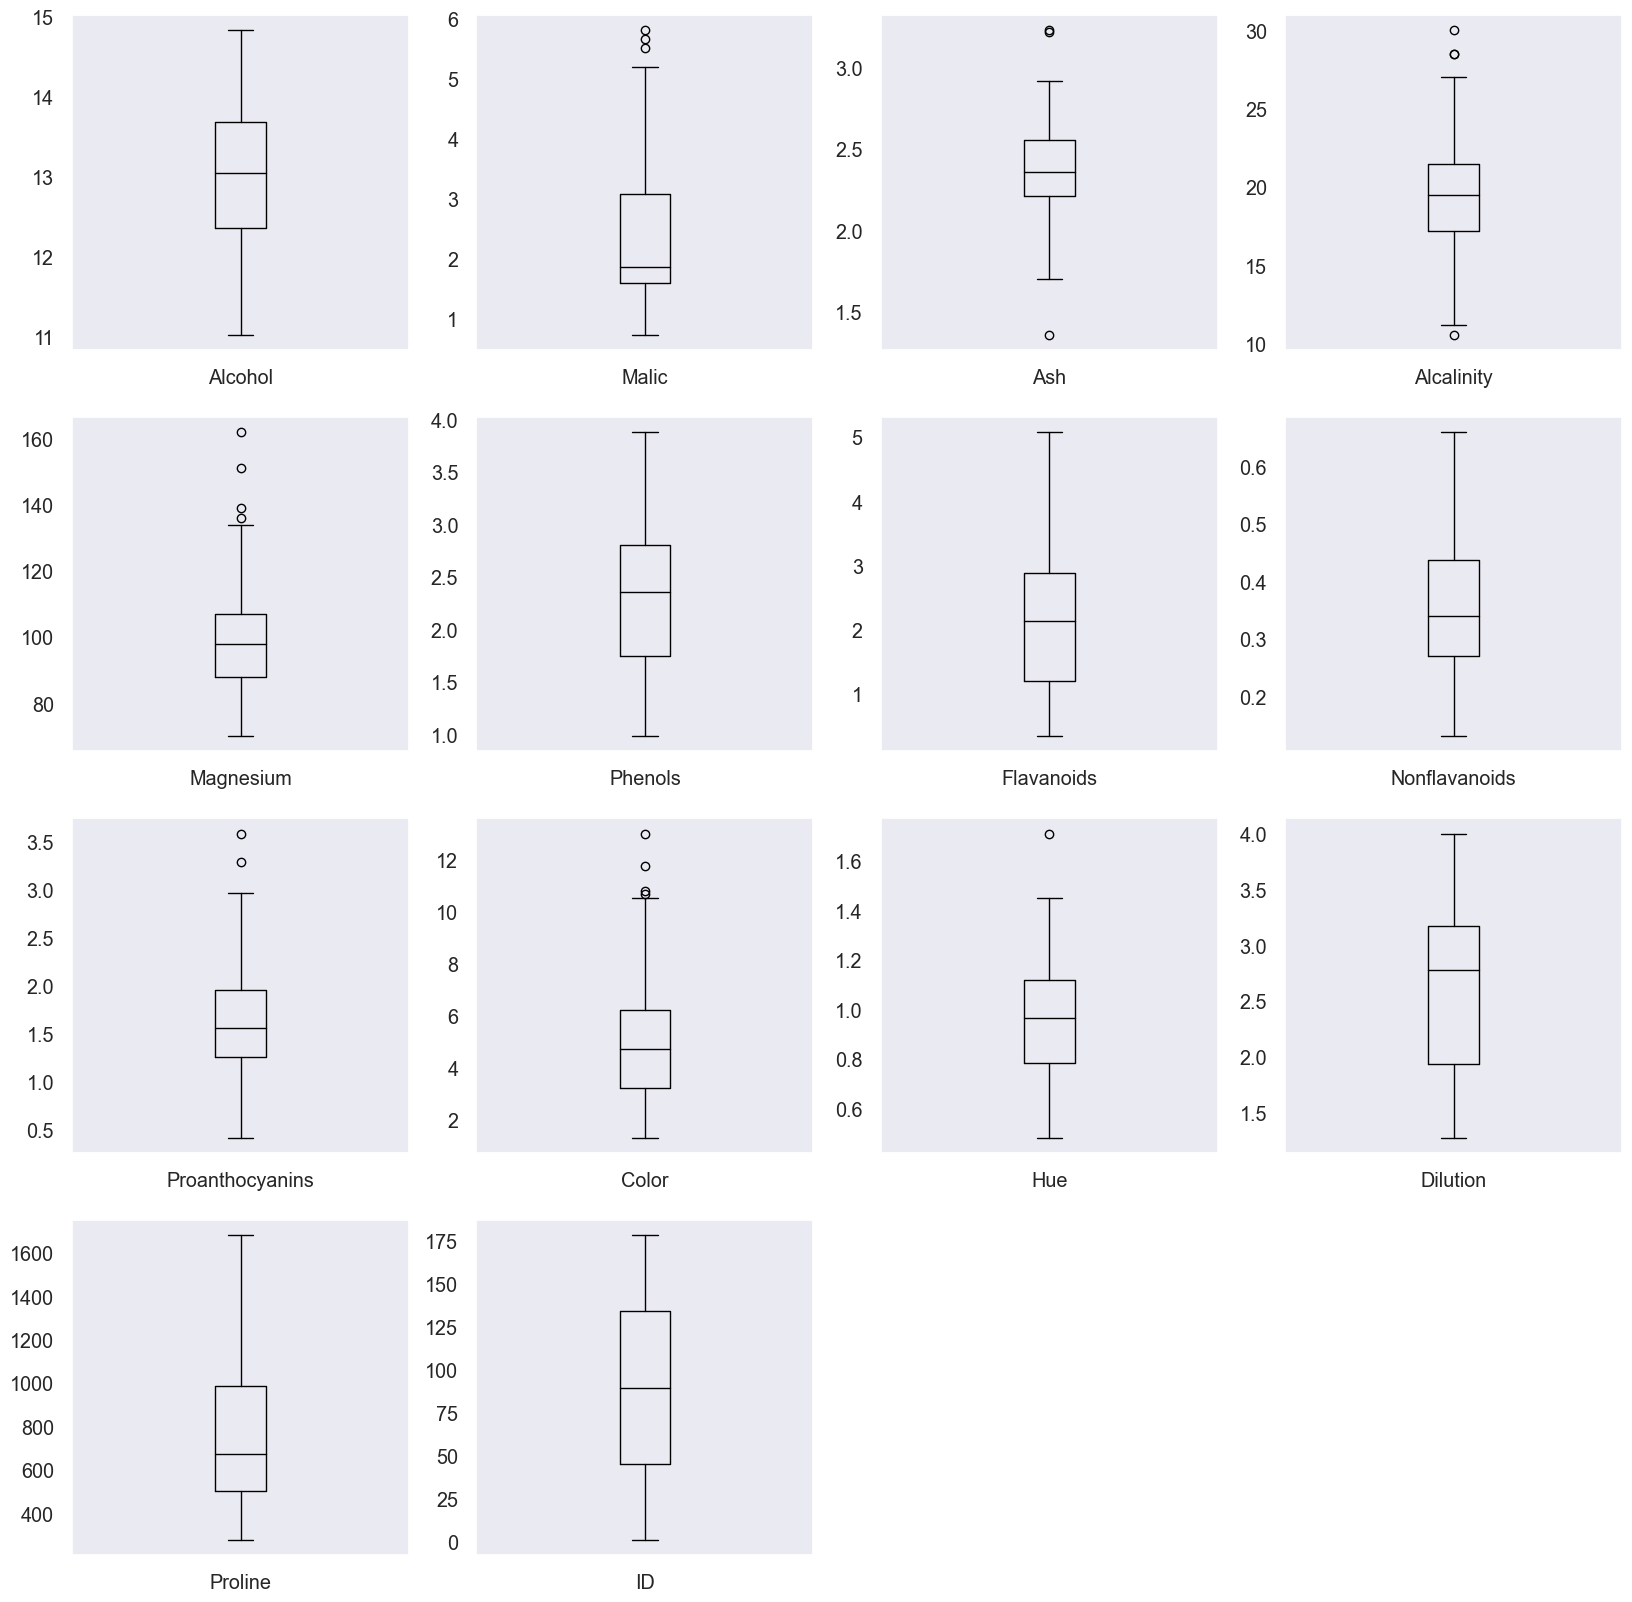

In [33]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

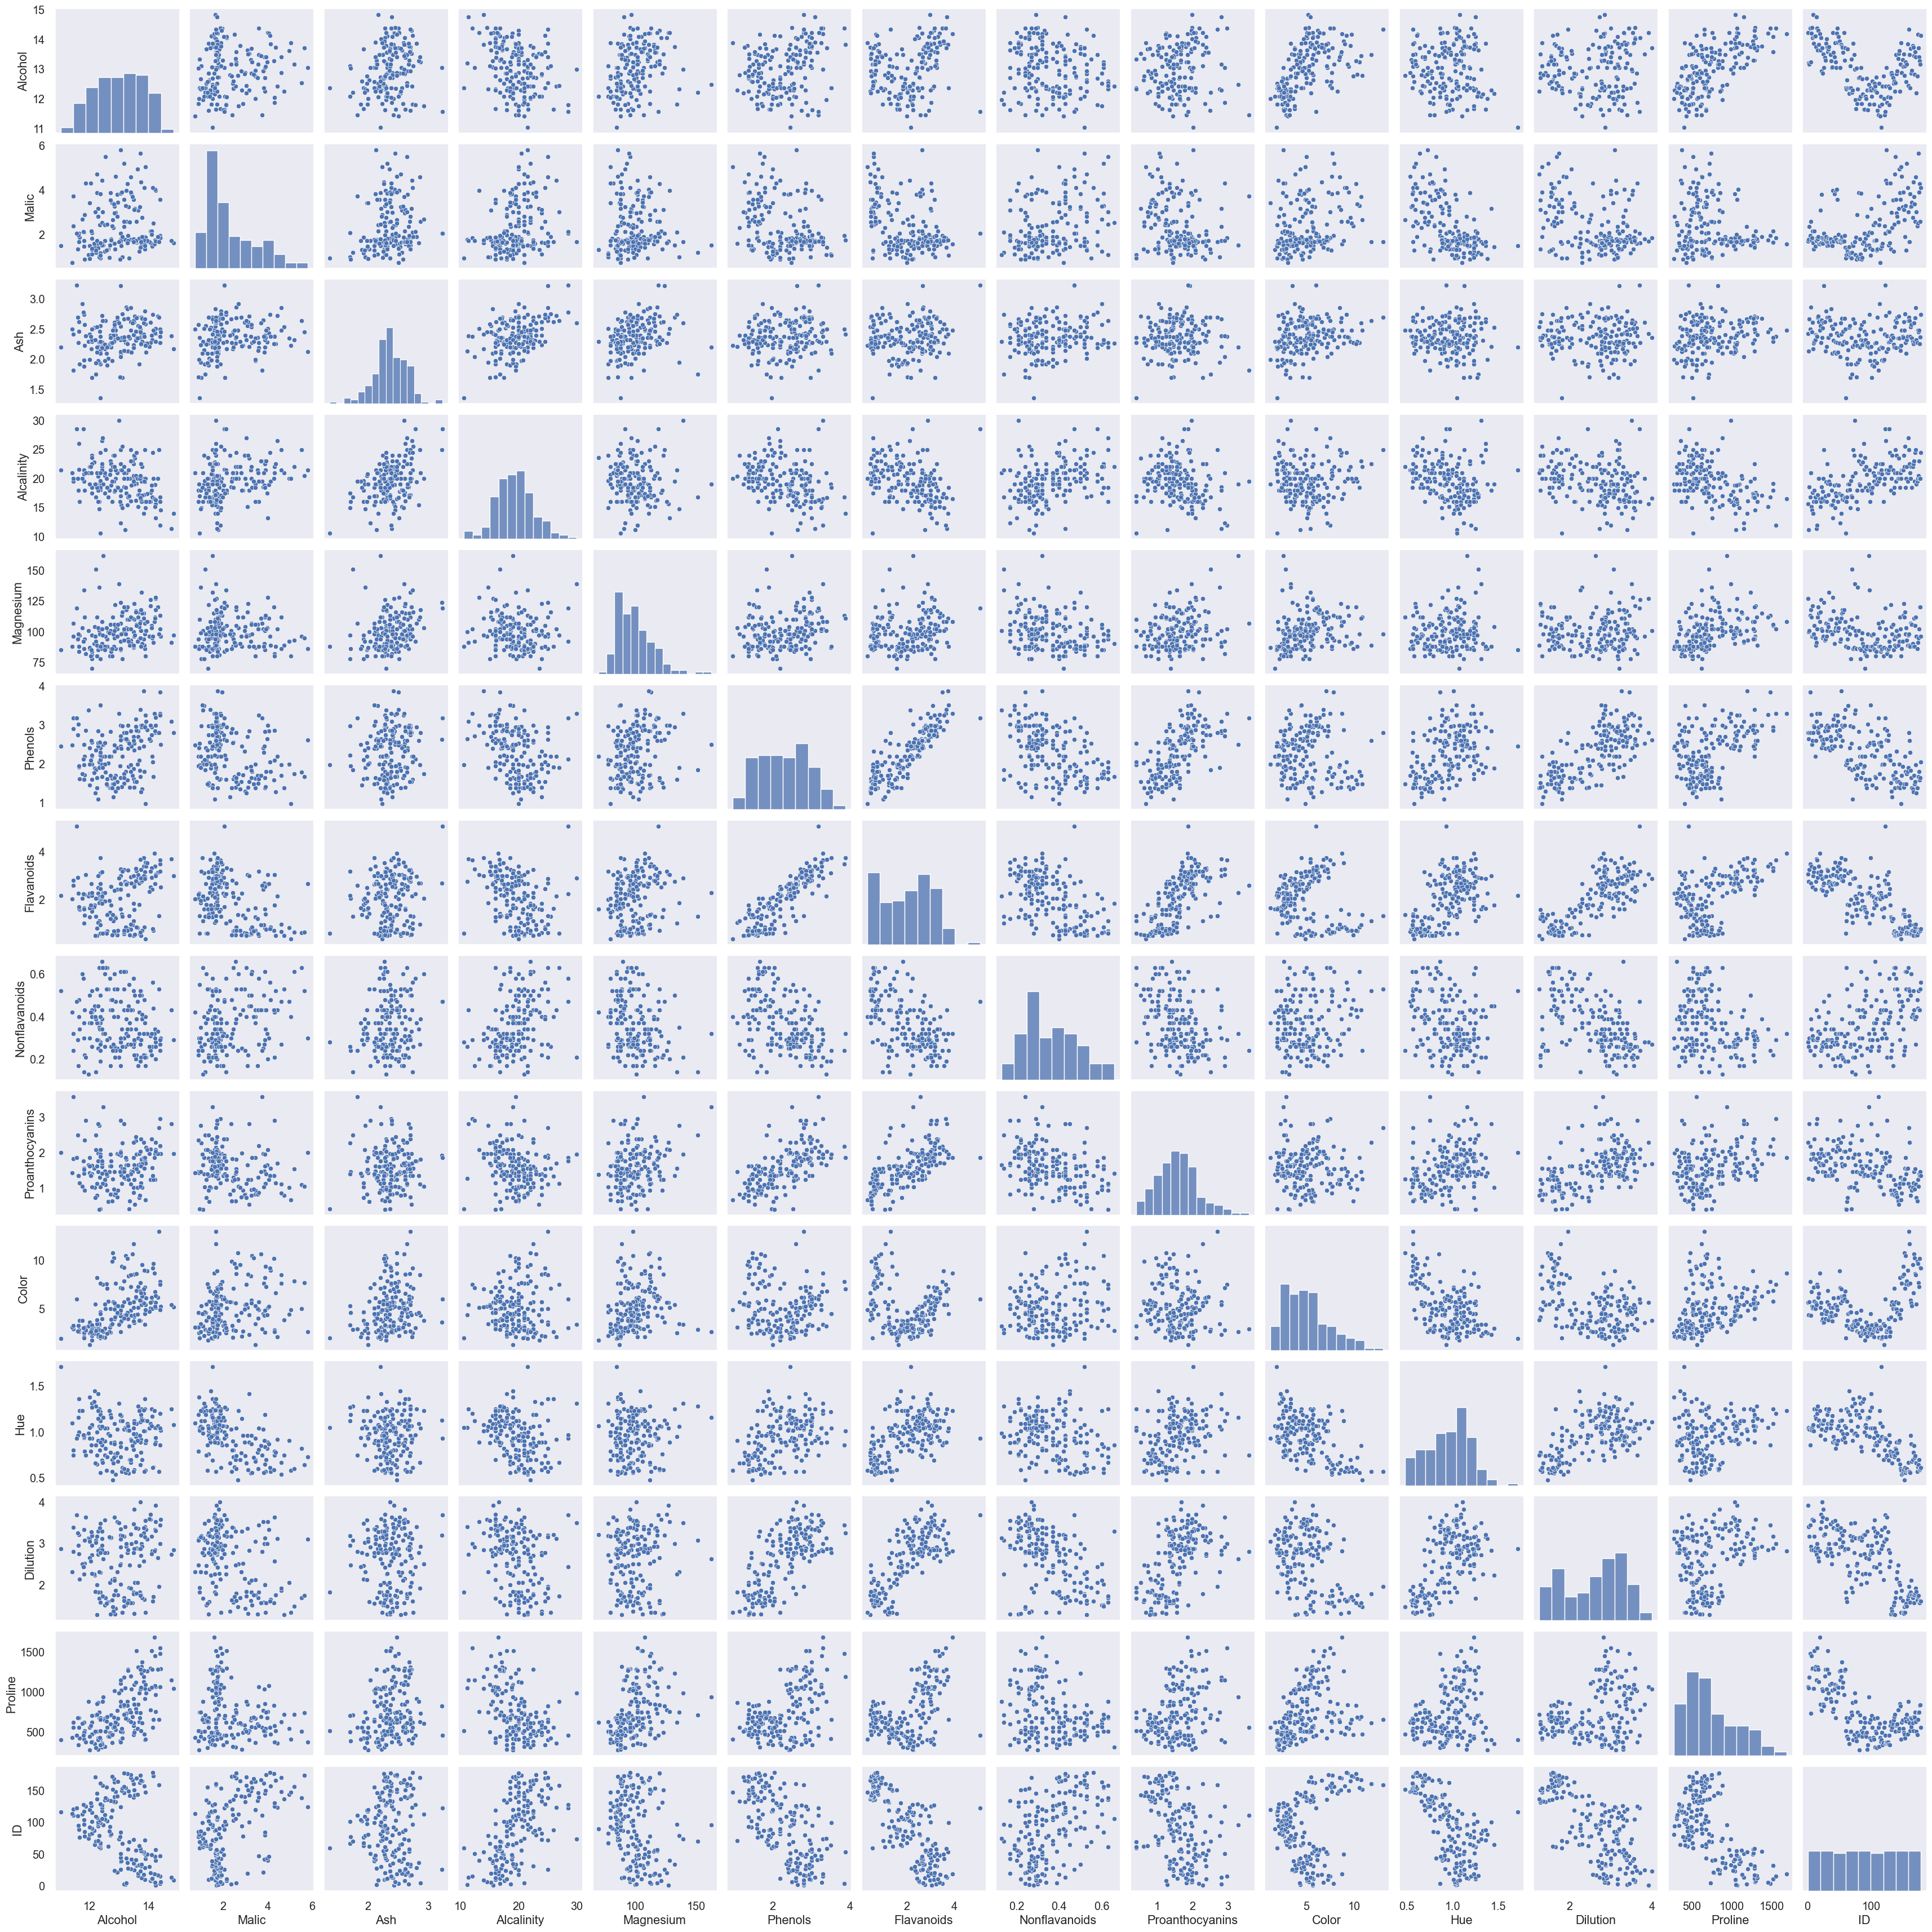

In [34]:
sns.pairplot(df,palette="dark")

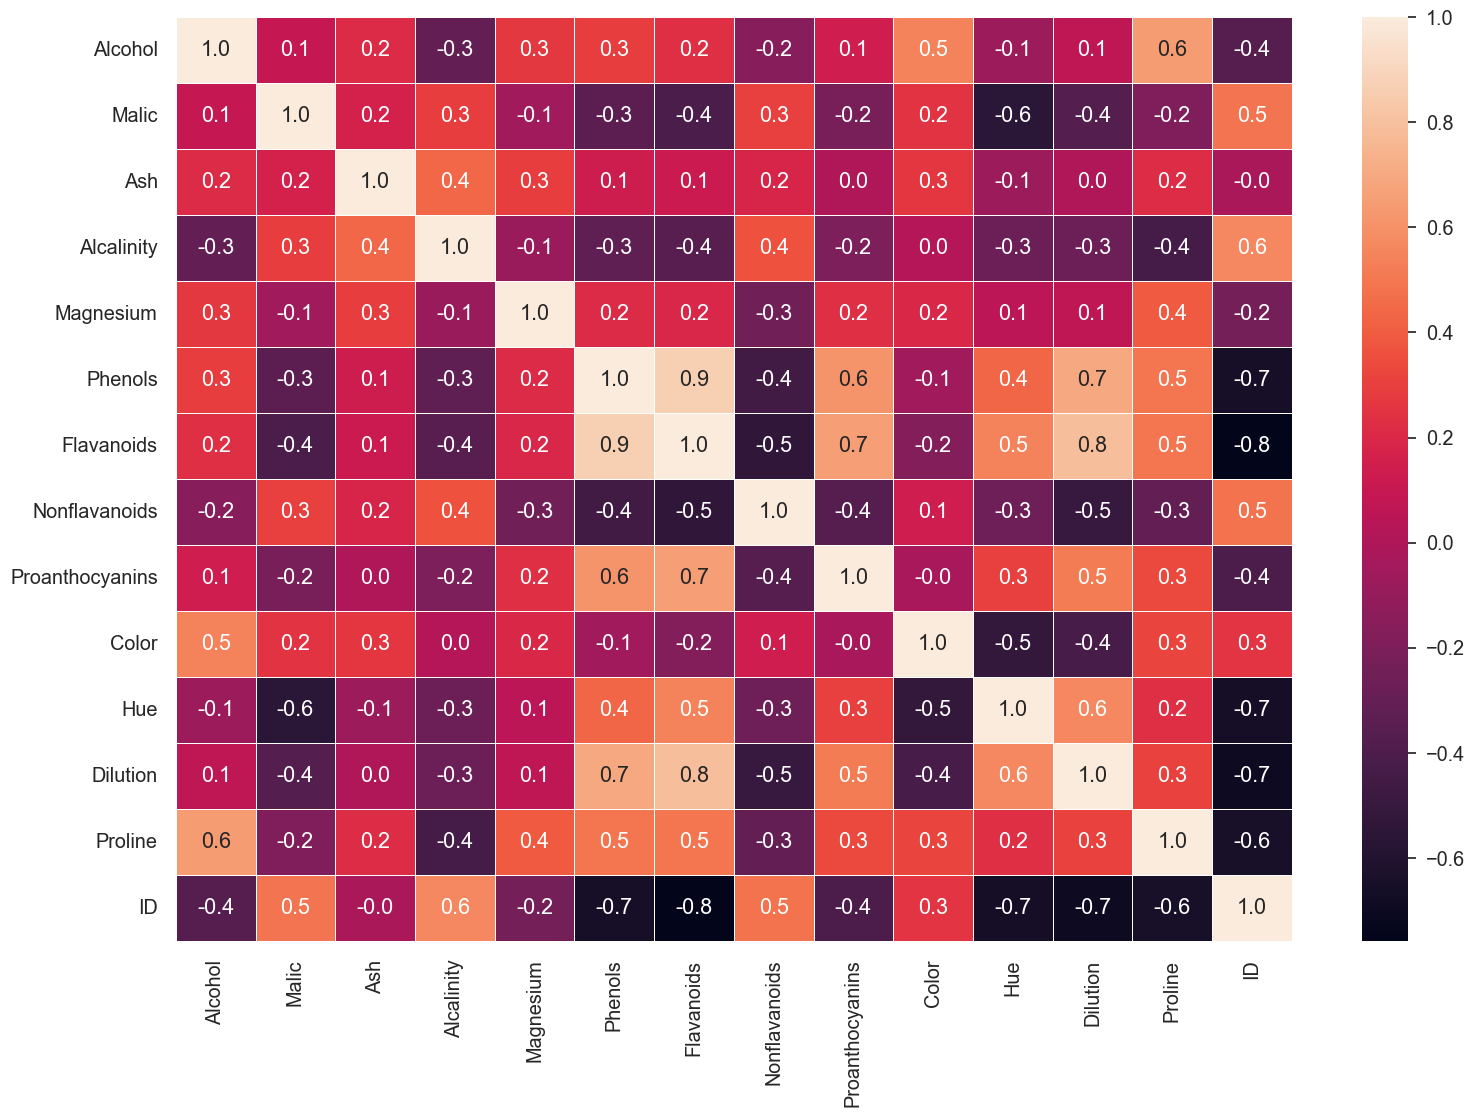

In [35]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

<Axes: >

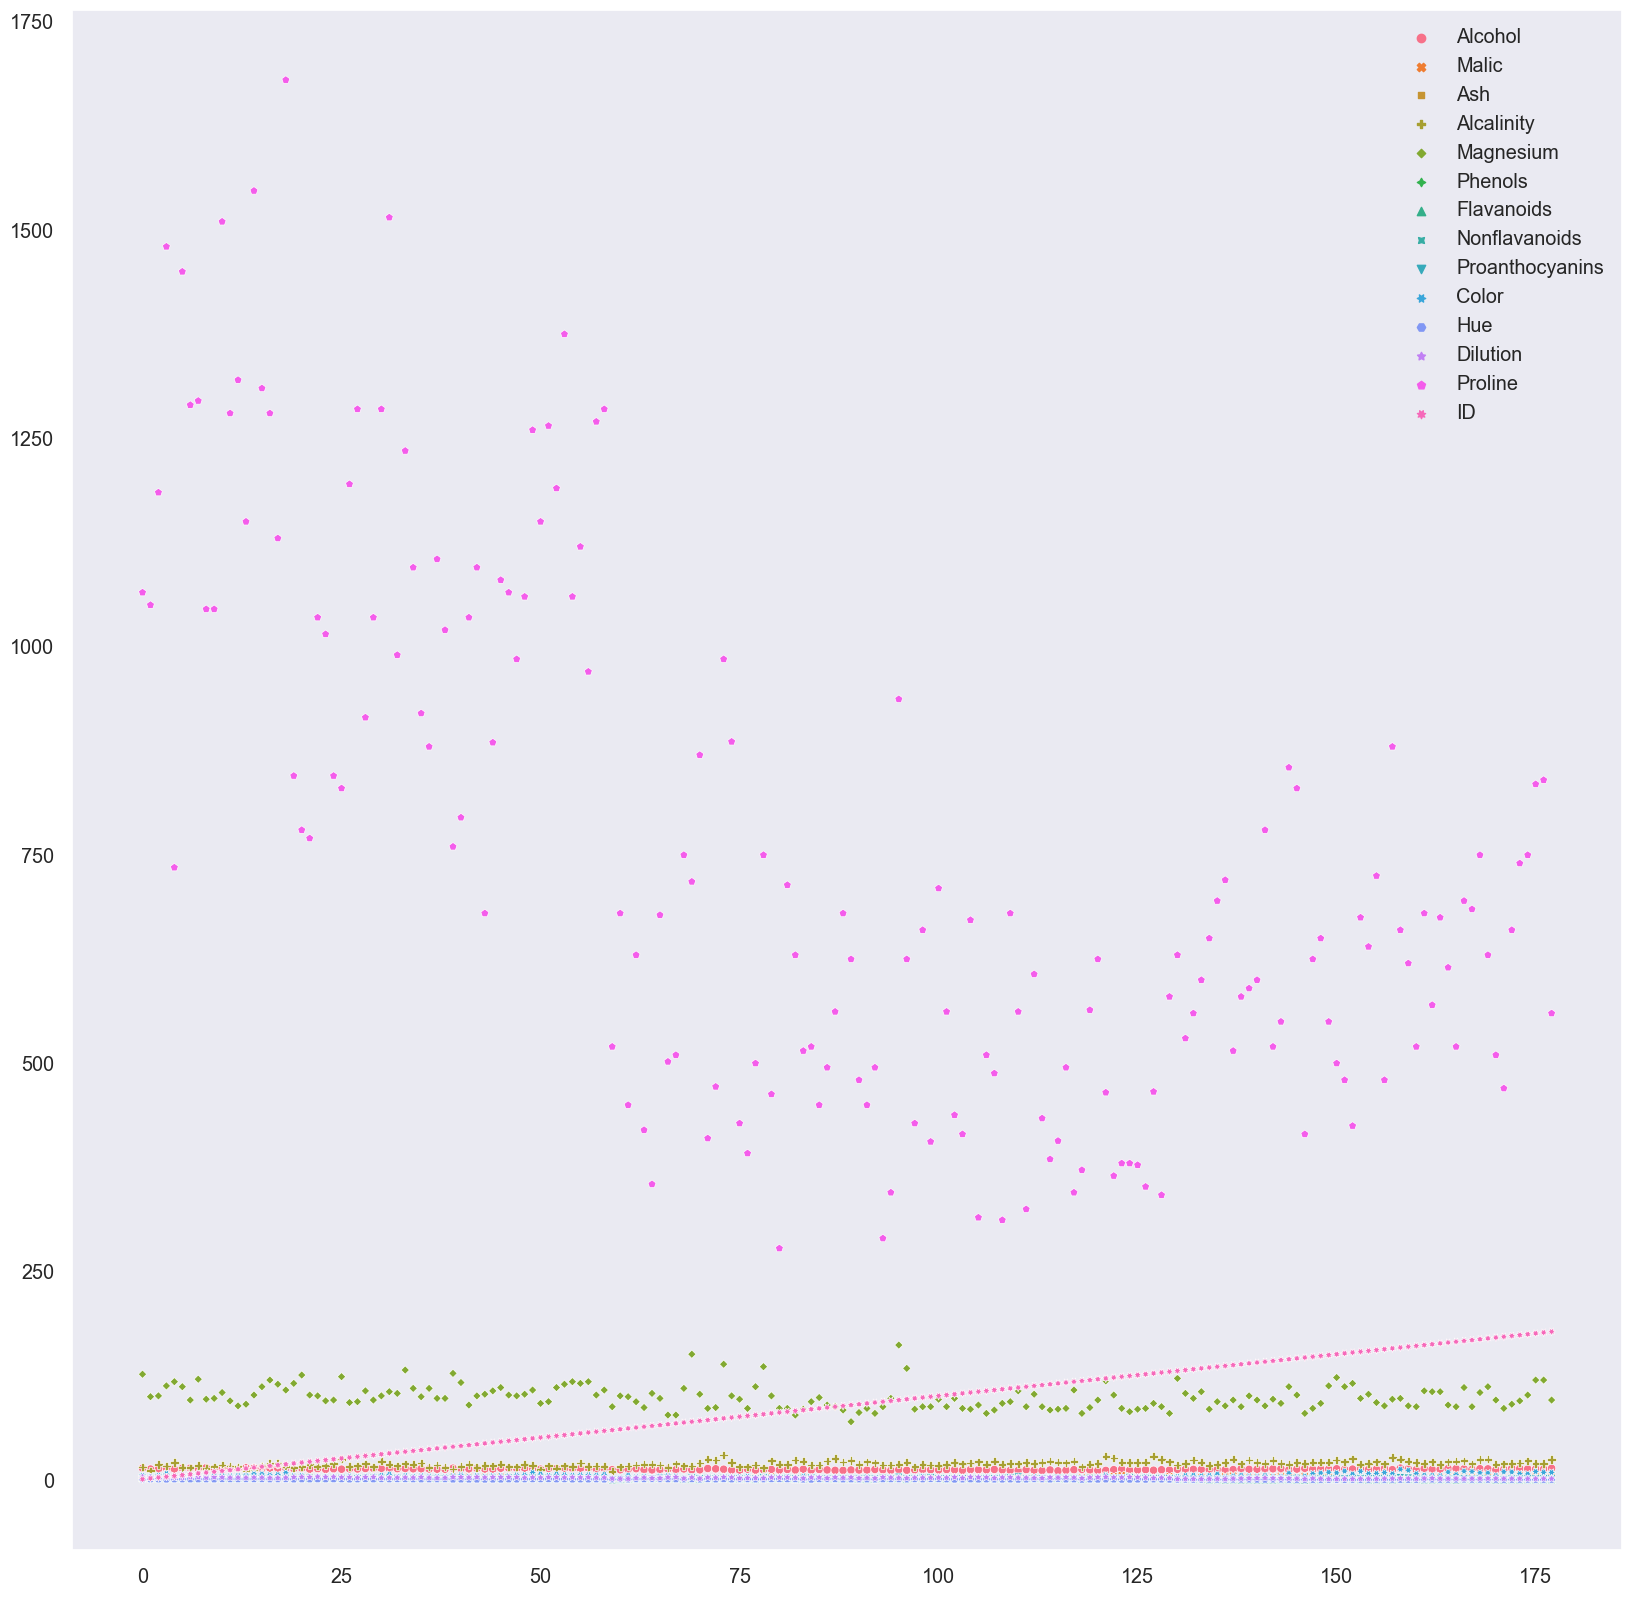

In [38]:
sns.scatterplot(df)

### PCA Implementation

In [39]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

In [42]:
# Applying PCA Fit Transform to dataset
pca=PCA(n_components=13)

wine_pca=pca.fit_transform(std_df)
wine_pca

array([[ 3.72381616, -1.44747583, -0.15327437, ..., -0.37490253,
         0.54620863,  0.10760217],
       [ 2.7349874 ,  0.33416576, -2.07971676, ..., -0.12181218,
         0.37102562,  0.16064863],
       [ 2.94483965, -1.03358257,  0.97957048, ..., -0.32077643,
        -0.1049505 ,  0.45358729],
       ...,
       [-3.13516894, -2.7589254 , -0.89049641, ...,  0.51579234,
         0.68767707,  0.06758145],
       [-2.86535194, -2.29618369, -0.51258368, ...,  0.37921573,
         0.41341715, -0.25336591],
       [-3.64317056, -2.76566302,  1.0058223 , ..., -0.24304041,
        -0.14990322, -0.35725859]])

In [43]:
# PCA Components matrix or covariance Matrix
pca.components_

array([[ 0.14093939, -0.22967334, -0.00135106, -0.23150237,  0.12816915,
         0.35747237,  0.38777415, -0.26977542,  0.27452714, -0.08896485,
         0.28333457,  0.34681723,  0.27381098, -0.38420912],
       [-0.48386023, -0.2242461 , -0.31610055,  0.0110077 , -0.30017375,
        -0.066521  ,  0.00188405, -0.02765454, -0.04075694, -0.52984653,
         0.27852036,  0.16322331, -0.3655483 , -0.00388692],
       [-0.20906683,  0.08478135,  0.61101157,  0.60401142,  0.13728369,
         0.17013877,  0.1717281 ,  0.14288318,  0.18378943, -0.13174465,
         0.08118022,  0.18221719, -0.1262318 ,  0.07984411],
       [-0.08798655,  0.38104469, -0.29301604,  0.02531119, -0.11218792,
         0.20102715,  0.15331411, -0.35550135,  0.4835603 ,  0.09917453,
        -0.4130273 ,  0.14423013, -0.23067964,  0.26345143],
       [-0.24684274, -0.19584034, -0.08231976,  0.03124785,  0.79625628,
        -0.18193957, -0.13691241, -0.40544201,  0.03265918, -0.06374516,
        -0.01457257, -0.15

In [44]:
# The amount of variance that each PCA has
var=pca.explained_variance_ratio_
var

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803])

In [45]:
# Cummulative variance of each PCA
var1=np.cumsum(np.round(var,4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39])

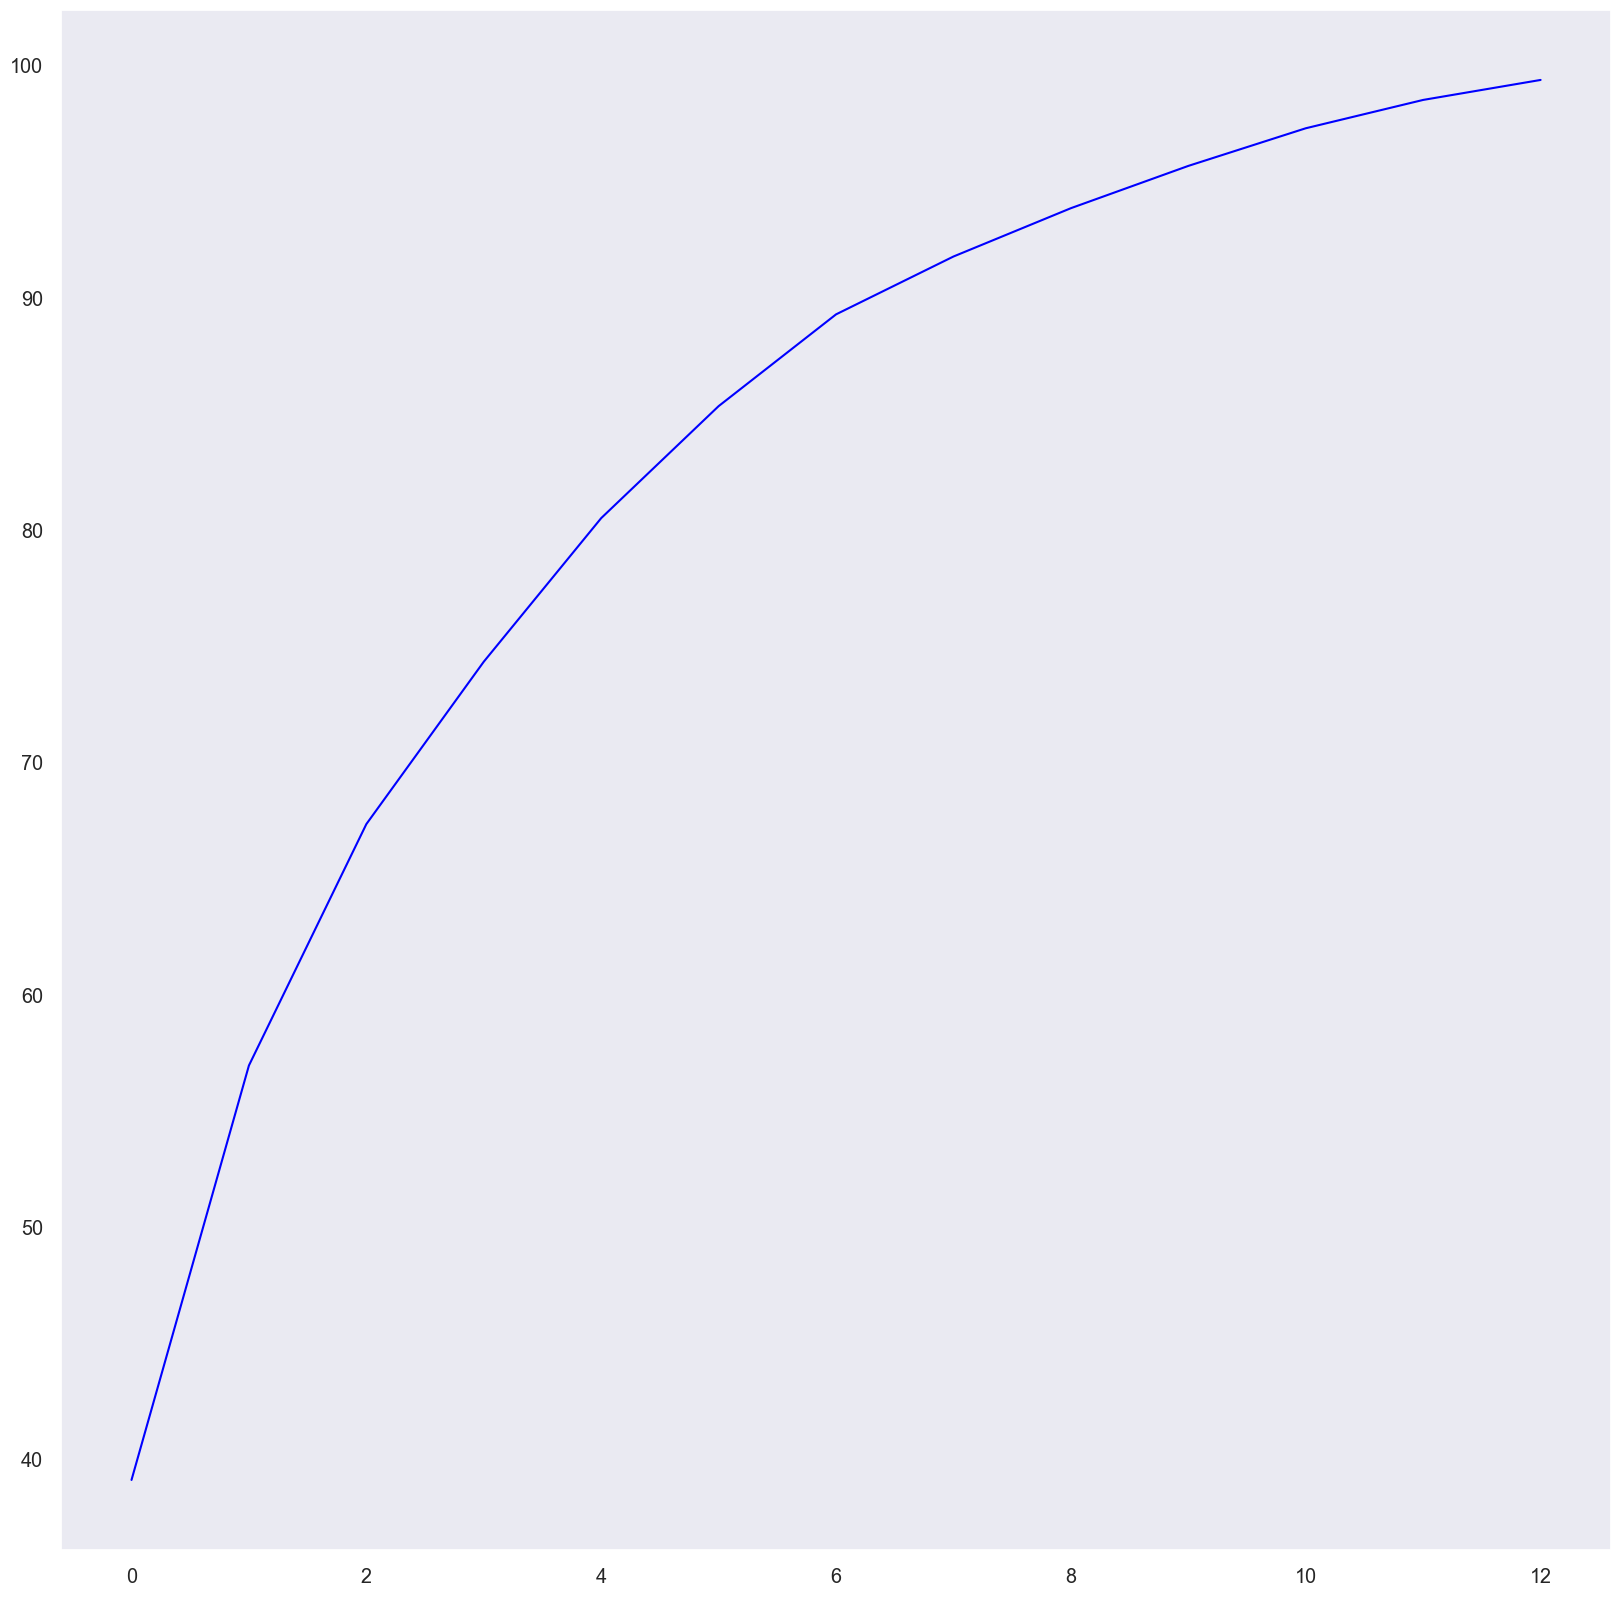

In [47]:
# Variance plot for PCA components obtained 
plt.plot(var1,color='blue')

In [49]:
# Final Dataframe
final_df=pd.concat([data['Type'],pd.DataFrame(wine_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Type,PC1,PC2,PC3
0,1,3.723816,-1.447476,-0.153274
1,1,2.734987,0.334166,-2.079717
2,1,2.944840,-1.033583,0.979570
3,1,4.094144,-2.762344,-0.123541
4,1,1.550429,-0.867267,1.915570
...,...,...,...,...
173,3,-3.737761,-2.211434,-0.363132
174,3,-3.053668,-1.755506,0.233730
175,3,-3.135169,-2.758925,-0.890496
176,3,-2.865352,-2.296184,-0.512584


<Axes: >

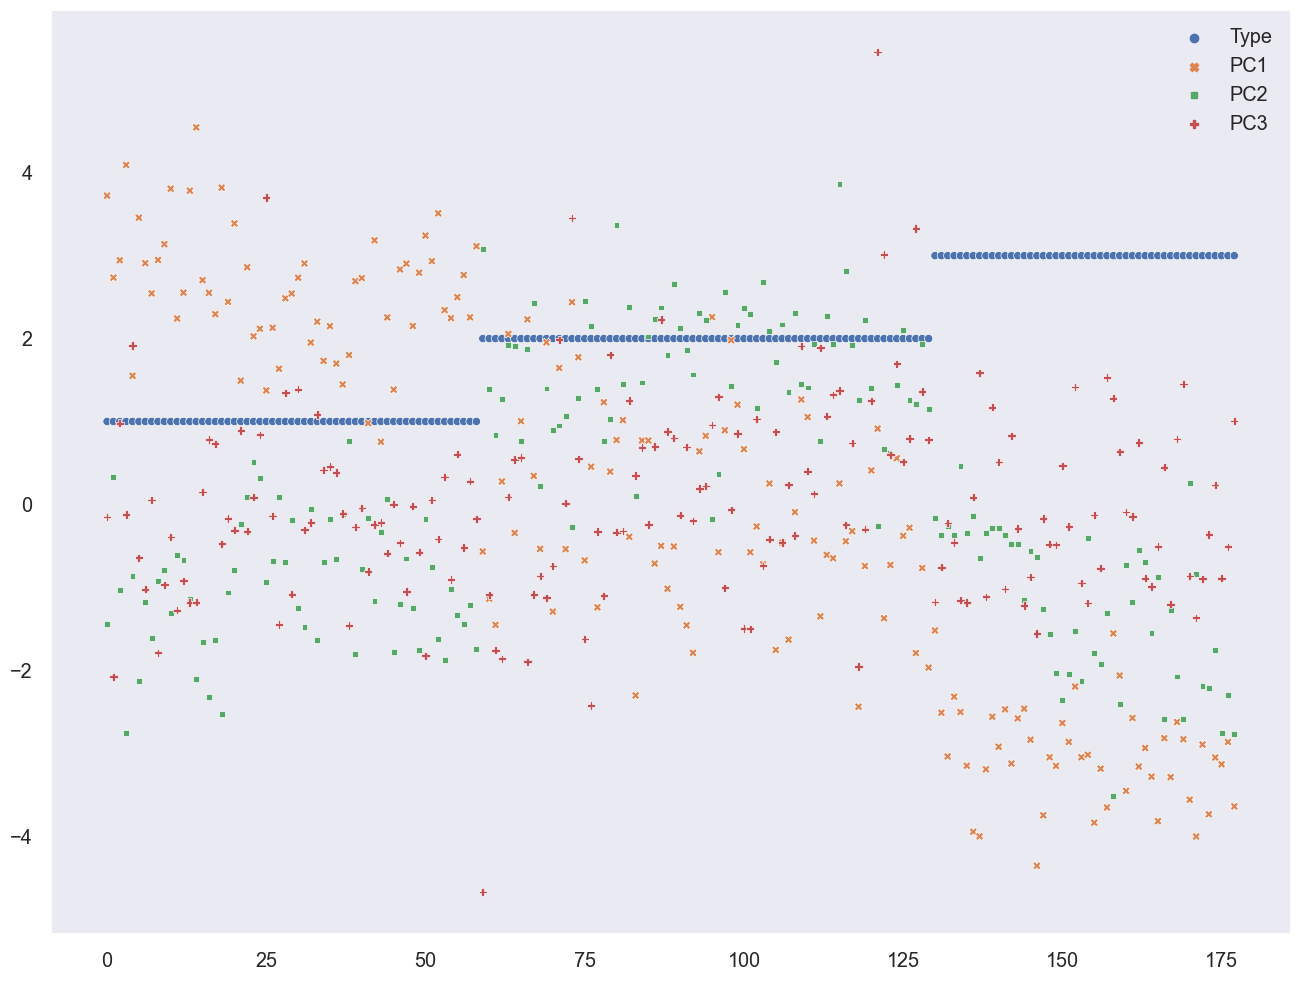

In [50]:
# Visualization of PCAs
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df)

### Other clustering Algorithms
#### Hierarchical Clustering

In [51]:
# Import Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

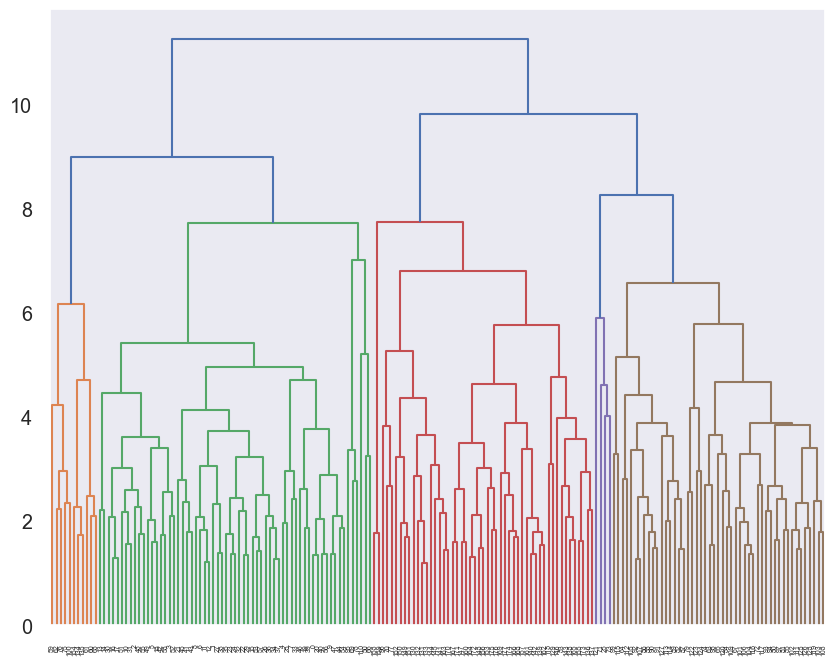

In [53]:
# As we already have normalized data, create Dendrograms
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(std_df,'complete'))

In [54]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [56]:
y=pd.DataFrame(hclusters.fit_predict(std_df),columns=['clustersid'])
y['clustersid'].value_counts()

clustersid
2    63
0    61
1    54
Name: count, dtype: int64

In [57]:
# Adding clusters to dataset
wine3=data.copy()
wine3['clustersid']=hclusters.labels_
wine3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID,clustersid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177,1


### K-Means algorithm

In [58]:
# Import Libraries
from sklearn.cluster import KMeans

In [59]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

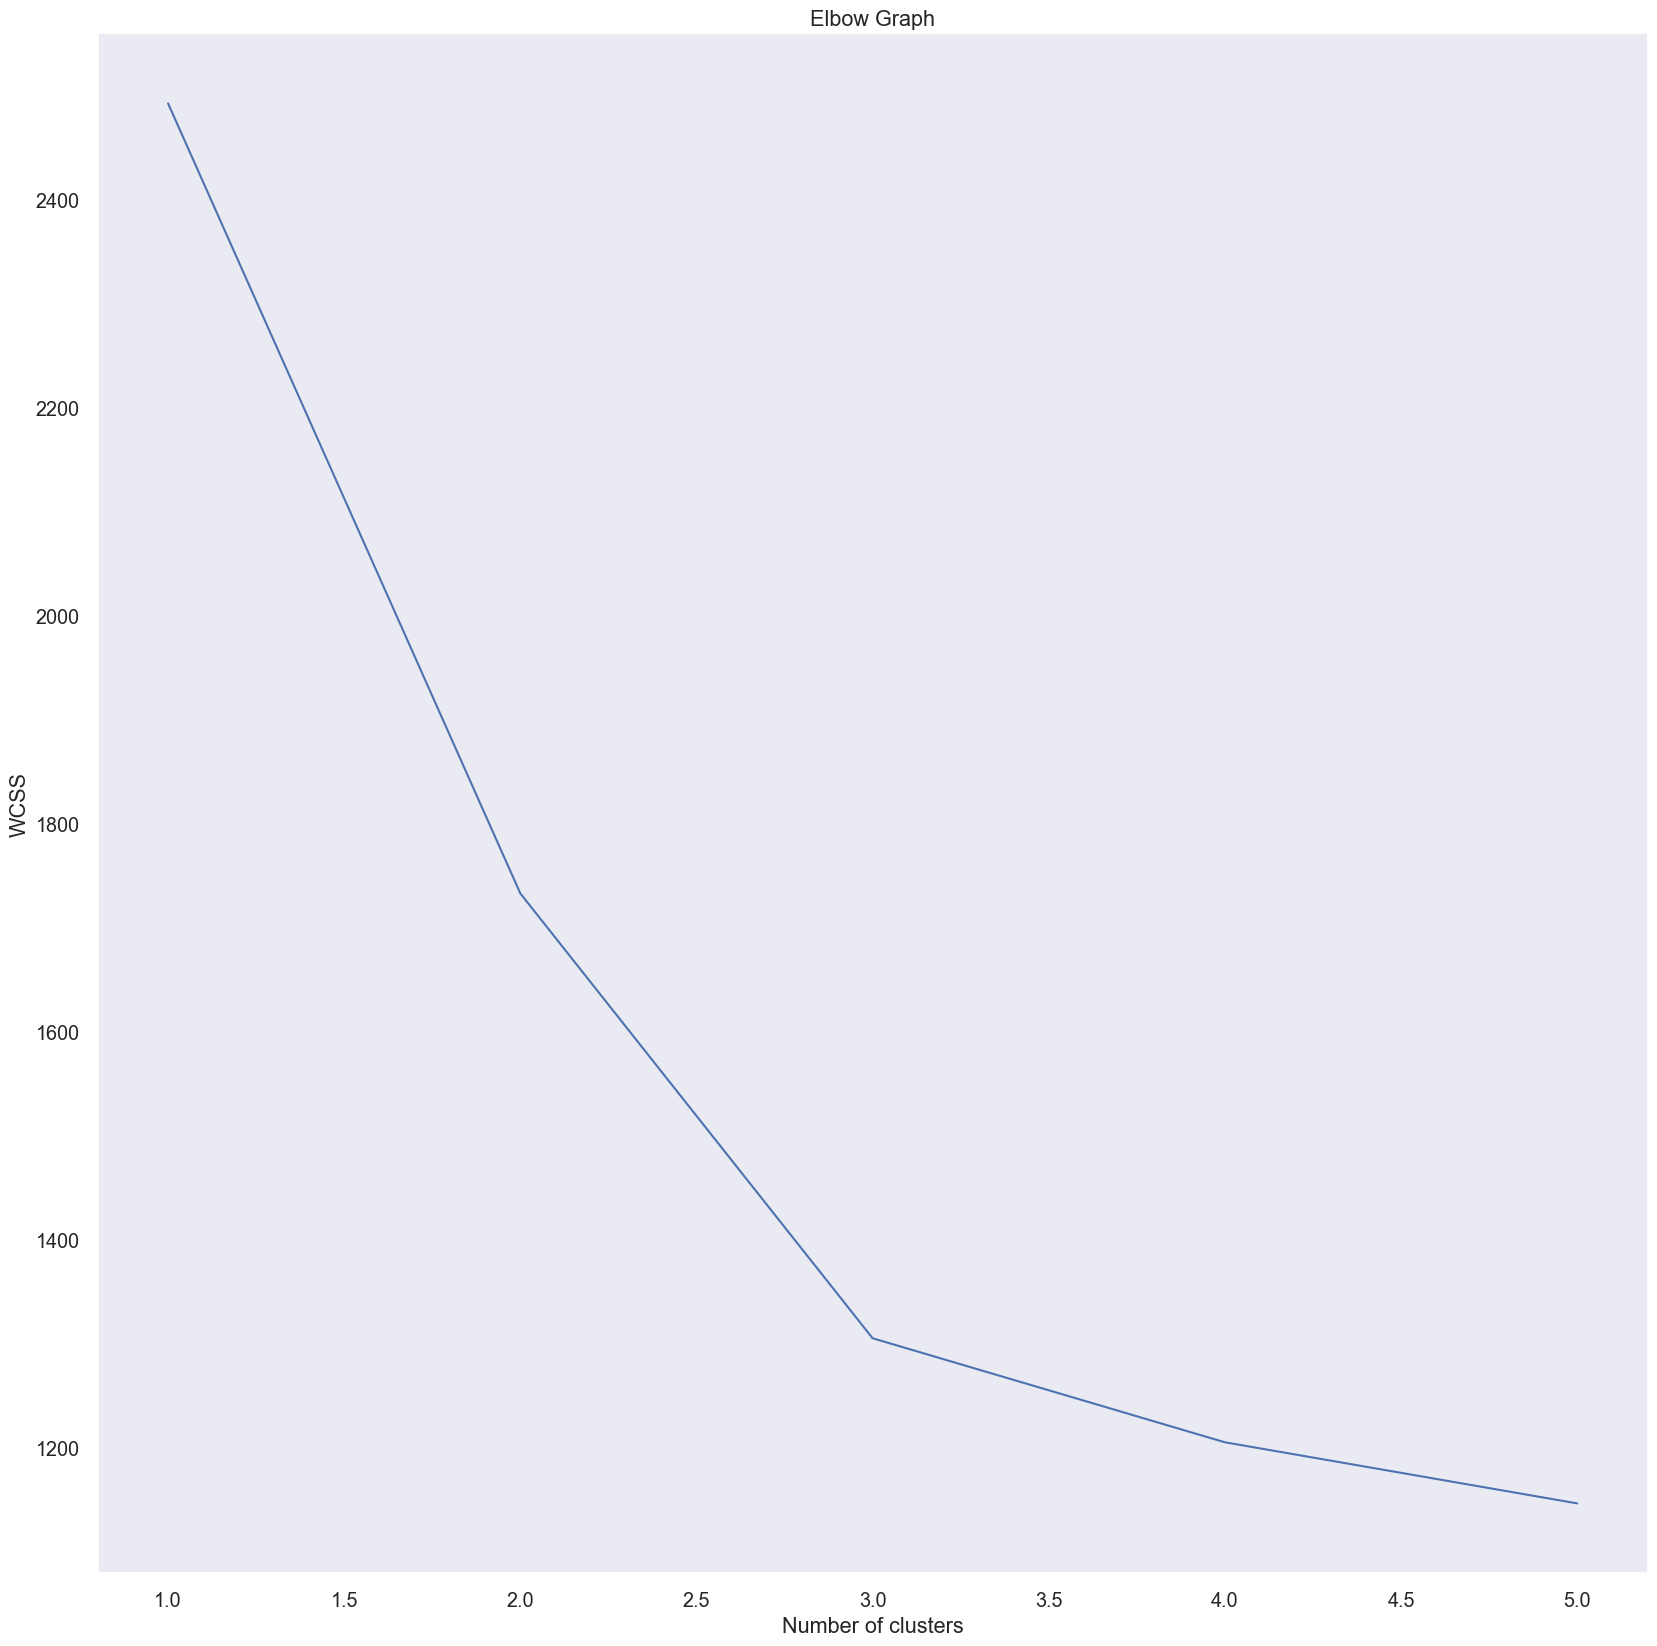

In [60]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Build Cluster algorithm using K=3

In [62]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=30).fit(std_df)
clusters3

KMeans(n_clusters=3, random_state=30)

In [63]:
clusters3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [64]:
# Assign clusters to the data set
wine4=data.copy()
wine4['clusters3id']=clusters3.labels_
wine4

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID,clusters3id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177,2


In [65]:
wine4['clusters3id'].value_counts()

clusters3id
0    67
1    61
2    50
Name: count, dtype: int64